#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pth = '/content/drive/MyDrive/SIB Celerates/'

In [ ]:
df = pd.read_csv(pth+'data_bersih.csv')
print(df.shape)
df.head()

(17922, 3)


,reviewContent,sentiment,corpus
0,mantap.. semoga awet barangnya.. maaf baru kas...,positif,mantap moga awet barang maaf kasih nilai
1,Seneng baranga cepat sampai packing juga rapih...,positif,senang baranga cepat packing rapi terima kasih
2,"Barang sampai dengan selamat,. berfungsi denga...",positif,barang selamat fungsi
3,Brg bagus cukup memuaskan,positif,barang bagus muas
4,Sesuai dengan pesanan,positif,sesuai pesan


In [ ]:
df.isnull().sum()

,0
reviewContent,0
sentiment,0
corpus,70


In [ ]:
df = df.dropna()
print(df.shape)
print(df.sentiment.value_counts())

(17852, 3)
sentiment
positif    8942
negatif    8910
Name: count, dtype: int64


In [ ]:
#downsampling
num_sample = len(df[df.sentiment=='negatif'])
ds_positif_label = df[df.sentiment=='positif'].sample(n=num_sample, random_state=1)

In [ ]:
df = pd.concat([ds_positif_label,df[df.sentiment=='negatif'].iloc[:num_sample]],axis=0)
print(df.shape)
print(df.sentiment.value_counts())

(17820, 3)
sentiment
positif    8910
negatif    8910
Name: count, dtype: int64


#Pembagian Dataset

In [ ]:
x, y =df.corpus, df.sentiment

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("train size:",x_train.shape)
print("test size:",x_test.shape)

train size: (12474, 10781)
test size: (5346, 10781)


#Evaluate Model Machine Learning

## Algoritma SVC

In [ ]:
st = time()

# Melatih model SVC
model = SVC()
model.fit(x_train,y_train)
print("[DONE] training process finished:",time()-st,"second(s)\n")

# Mengevaluasi model
y_pred = model.predict(x_test)

class_report = classification_report(y_test,y_pred)
conf_matrix_svc = confusion_matrix(y_test,y_pred)

print('Classification Report:\n', class_report)

[DONE] training process finished: 11.23337435722351 second(s)

Classification Report:
               precision    recall  f1-score   support

     negatif       0.91      0.95      0.93      2657
     positif       0.95      0.91      0.93      2689

    accuracy                           0.93      5346
   macro avg       0.93      0.93      0.93      5346
weighted avg       0.93      0.93      0.93      5346



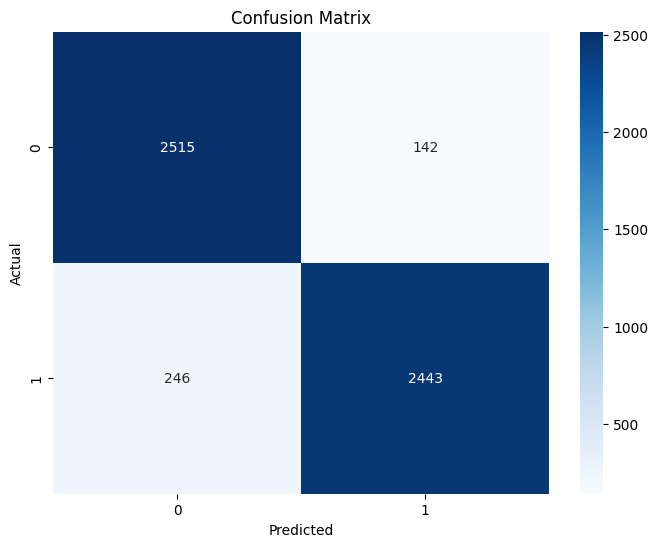

In [ ]:
# Menampilkan Confusion Matrix dengan sns heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Algoritma KNN

In [ ]:
from sklearn.model_selection import cross_val_score

# Daftar kandidat jumlah tetangga
k_values = list(range(1, 21))  # Mencoba k dari 1 hingga 20
cv_scores = []

# Menggunakan cross-validation untuk setiap k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Menentukan k terbaik
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Jumlah tetangga terbaik (k): {best_k}")

Jumlah tetangga terbaik (k): 3


In [ ]:
st = time()

# Melatih model KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
print("[DONE] training process finished:",time()-st,"second(s)\n")

# Mengevaluasi model
y_pred = model.predict(x_test)

class_report = classification_report(y_test,y_pred)
conf_matrix_knn = confusion_matrix(y_test,y_pred)

print('Classification Report:\n', class_report)

[DONE] training process finished: 0.017099857330322266 second(s)

Classification Report:
               precision    recall  f1-score   support

     negatif       0.84      0.94      0.89      2657
     positif       0.93      0.83      0.88      2689

    accuracy                           0.88      5346
   macro avg       0.89      0.88      0.88      5346
weighted avg       0.89      0.88      0.88      5346



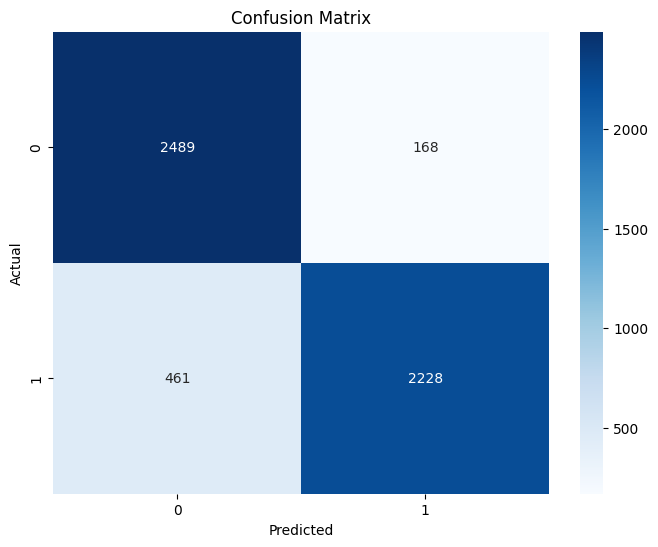

In [ ]:
# Menampilkan Confusion Matrix dengan sns heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()